In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [107]:
II_Corintios_1 = "Paul, an apostle of Jesus Christ by the will of God, and Timothy our brother, to the church of God which is at Corinth, with all the saints which are in all Achaia:Grace be to you and peace from God our Father, and from the Lord Jesus Christ.Blessed be God, even the Father of our Lord Jesus Christ, the Father of mercies, and the God of all comfort;Who comforts us in all our tribulation, that we may be able to comfort them which are in any trouble, by the comfort with which we ourselves are comforted of God.For as the sufferings of Christ abound in us, so our consolation also abounds by Christ.And whether we be afflicted, it is for your consolation and salvation, which is effectual in the enduring of the same sufferings which we also suffer: or whether we be comforted, it is for your consolation and salvation.And our hope of you is steadfast, knowing, that as you are partakers of the sufferings, so shall you be also of the consolation.For we would not, brothers, have you ignorant of our trouble which came to us in Asia, that we were pressed out of measure, above strength, so that we despaired even of life:But we had the sentence of death in ourselves, that we should not trust in ourselves, but in God which raises the dead:Who delivered us from so great a death, and does deliver: in whom we trust that he will yet deliver us;You also helping together by prayer for us, that for the gift bestowed on us by the means of many persons thanks may be given by many on our behalf.For our rejoicing is this, the testimony of our conscience, that in simplicity and godly sincerity, not with fleshly wisdom, but by the grace of God, we have had our conversation in the world, and more abundantly to you-ward.For we write none other things to you, than what you read or acknowledge; and I trust you shall acknowledge even to the end;As also you have acknowledged us in part, that we are your rejoicing, even as you also are our' in the day of the Lord Jesus.And in this confidence I was minded to come to you before, that you might have a second benefit;And to pass by you into Macedonia, and to come again out of Macedonia to you, and of you to be brought on my way toward Judaea.When I therefore was thus minded, did I use lightness? or the things that I purpose, do I purpose according to the flesh, that with me there should be yes yes, and no no?But as God is true, our word toward you was not yes and no.For the Son of God, Jesus Christ, who was preached among you by us, even by me and Silvanus and Timotheus, was not yes and no, but in him was yes.For all the promises of God in him are yes, and in him Amen, to the glory of God by us.Now he which establishes us with you in Christ, and has anointed us, is God;Who has also sealed us, and given the earnest of the Spirit in our hearts.Moreover I call God for a record on my soul, that to spare you I came not as yet to Corinth.Not for that we have dominion over your faith, but are helpers of your joy: for by faith you stand.".lower()

In [108]:
II_Corintios_2 = "But I determined this with myself, that I would not come again to you in heaviness.For if I make you sorry, who is he then that makes me glad, but the same which is made sorry by me?And I wrote this same to you, lest, when I came, I should have sorrow from them of whom I ought to rejoice; having confidence in you all, that my joy is the joy of you all.For out of much affliction and anguish of heart I wrote to you with many tears; not that you should be grieved, but that you might know the love which I have more abundantly to you.But if any have caused grief, he has not grieved me, but in part: that I may not overcharge you all.Sufficient to such a man is this punishment, which was inflicted of many.So that contrariwise you ought rather to forgive him, and comfort him, lest perhaps such a one should be swallowed up with overmuch sorrow.Why I beseech you that you would confirm your love toward him.For to this end also did I write, that I might know the proof of you, whether you be obedient in all things.To whom you forgive any thing, I forgive also: for if I forgave any thing, to whom I forgave it, for your sakes forgave I it in the person of Christ;Lest Satan should get an advantage of us: for we are not ignorant of his devices.Furthermore, when I came to Troas to preach Christ' gospel, and a door was opened to me of the Lord,I had no rest in my spirit, because I found not Titus my brother: but taking my leave of them, I went from there into Macedonia.Now thanks be to God, which always causes us to triumph in Christ, and makes manifest the aroma of his knowledge by us in every place.For we are to God a sweet smell of Christ, in them that are saved, and in them that perish:To the one we are the smell of death to death; and to the other the smell of life to life. And who is sufficient for these things?For we are not as many, which corrupt the word of God: but as of sincerity, but as of God, in the sight of God speak we in Christ.".lower()

In [109]:
II_Corintios_3 = "Do we begin again to commend ourselves? or need we, as some others, letters of commendation to you, or letters of commendation from you?You are our letter written in our hearts, known and read of all men:For as much as you are manifestly declared to be the letter of Christ ministered by us, written not with ink, but with the Spirit of the living God; not in tables of stone, but in fleshy tables of the heart.And such trust have we through Christ to God-ward:Not that we are sufficient of ourselves to think any thing as of ourselves; but our sufficiency is of God;Who also has made us able ministers of the new testament; not of the letter, but of the spirit: for the letter kills, but the spirit gives life.But if the ministration of death, written and engraved in stones, was glorious, so that the children of Israel could not steadfastly behold the face of Moses for the glory of his countenance; which glory was to be done away:How shall not the ministration of the spirit be rather glorious?For if the ministration of condemnation be glory, much more does the ministration of righteousness exceed in glory.For even that which was made glorious had no glory in this respect, by reason of the glory that excels.For if that which is done away was glorious, much more that which remains is glorious.Seeing then that we have such hope, we use great plainness of speech:And not as Moses, which put a veil over his face, that the children of Israel could not steadfastly look to the end of that which is abolished:But their minds were blinded: for until this day remains the same veil not taken away in the reading of the old testament; which veil is done away in Christ.But even to this day, when Moses is read, the veil is on their heart.Nevertheless when it shall turn to the Lord, the veil shall be taken away.Now the Lord is that Spirit: and where the Spirit of the Lord is, there is liberty.But we all, with open face beholding as in a glass the glory of the Lord, are changed into the same image from glory to glory, even as by the Spirit of the LORD.".lower()

In [110]:
II_Corintios_4 = "Therefore seeing we have this ministry, as we have received mercy, we faint not;But have renounced the hidden things of dishonesty, not walking in craftiness, nor handling the word of God deceitfully; but by manifestation of the truth commending ourselves to every man' conscience in the sight of God.But if our gospel be hid, it is hid to them that are lost:In whom the god of this world has blinded the minds of them which believe not, lest the light of the glorious gospel of Christ, who is the image of God, should shine to them.For we preach not ourselves, but Christ Jesus the Lord; and ourselves your servants for Jesus'sake.For God, who commanded the light to shine out of darkness, has shined in our hearts, to give the light of the knowledge of the glory of God in the face of Jesus Christ.But we have this treasure in earthen vessels, that the excellency of the power may be of God, and not of us.We are troubled on every side, yet not distressed; we are perplexed, but not in despair;Persecuted, but not forsaken; cast down, but not destroyed;Always bearing about in the body the dying of the Lord Jesus, that the life also of Jesus might be made manifest in our body.For we which live are always delivered to death for Jesus'sake, that the life also of Jesus might be made manifest in our mortal flesh.So then death works in us, but life in you.We having the same spirit of faith, according as it is written, I believed, and therefore have I spoken; we also believe, and therefore speak;Knowing that he which raised up the Lord Jesus shall raise up us also by Jesus, and shall present us with you.For all things are for your sakes, that the abundant grace might through the thanksgiving of many redound to the glory of God.For which cause we faint not; but though our outward man perish, yet the inward man is renewed day by day.For our light affliction, which is but for a moment, works for us a far more exceeding and eternal weight of glory;While we look not at the things which are seen, but at the things which are not seen: for the things which are seen are temporal; but the things which are not seen are eternal.".lower()

In [111]:
II_Corintios_5 = "For we know that if our earthly house of this tabernacle were dissolved, we have a building of God, an house not made with hands, eternal in the heavens.For in this we groan, earnestly desiring to be clothed on with our house which is from heaven:If so be that being clothed we shall not be found naked.For we that are in this tabernacle do groan, being burdened: not for that we would be unclothed, but clothed on, that mortality might be swallowed up of life.Now he that has worked us for the selfsame thing is God, who also has given to us the earnest of the Spirit.Therefore we are always confident, knowing that, whilst we are at home in the body, we are absent from the Lord:(For we walk by faith, not by sight:)We are confident, I say, and willing rather to be absent from the body, and to be present with the Lord.Why we labor, that, whether present or absent, we may be accepted of him.For we must all appear before the judgment seat of Christ; that every one may receive the things done in his body, according to that he has done, whether it be good or bad.Knowing therefore the terror of the Lord, we persuade men; but we are made manifest to God; and I trust also are made manifest in your consciences.For we commend not ourselves again to you, but give you occasion to glory on our behalf, that you may have somewhat to answer them which glory in appearance, and not in heart.For whether we be beside ourselves, it is to God: or whether we be sober, it is for your cause.For the love of Christ constrains us; because we thus judge, that if one died for all, then were all dead:And that he died for all, that they which live should not from now on live to themselves, but to him which died for them, and rose again.Why from now on know we no man after the flesh: yes, though we have known Christ after the flesh, yet now from now on know we him no more.Therefore if any man be in Christ, he is a new creature: old things are passed away; behold, all things are become new.And all things are of God, who has reconciled us to himself by Jesus Christ, and has given to us the ministry of reconciliation;To wit, that God was in Christ, reconciling the world to himself, not imputing their trespasses to them; and has committed to us the word of reconciliation.Now then we are ambassadors for Christ, as though God did beseech you by us: we pray you in Christ' stead, be you reconciled to God.For he has made him to be sin for us, who knew no sin; that we might be made the righteousness of God in him.".lower()

In [112]:
II_Corintios_6 = "We then, as workers together with him, beseech you also that you receive not the grace of God in vain.(For he said, I have heard you in a time accepted, and in the day of salvation have I succored you: behold, now is the accepted time; behold, now is the day of salvation.)Giving no offense in any thing, that the ministry be not blamed:But in all things approving ourselves as the ministers of God, in much patience, in afflictions, in necessities, in distresses,In stripes, in imprisonments, in tumults, in labors, in watchings, in fastings;By pureness, by knowledge, by long-suffering, by kindness, by the Holy Ghost, by love unfeigned,By the word of truth, by the power of God, by the armor of righteousness on the right hand and on the left,By honor and dishonor, by evil report and good report: as deceivers, and yet true;As unknown, and yet well known; as dying, and, behold, we live; as chastened, and not killed;As sorrowful, yet always rejoicing; as poor, yet making many rich; as having nothing, and yet possessing all things.O you Corinthians, our mouth is open to you, our heart is enlarged.You are not straitened in us, but you are straitened in your own bowels.Now for a recompense in the same, (I speak as to my children,) be you also enlarged.Be you not unequally yoked together with unbelievers: for what fellowship has righteousness with unrighteousness? and what communion has light with darkness?And what concord has Christ with Belial? or what part has he that believes with an infidel?And what agreement has the temple of God with idols? for you are the temple of the living God; as God has said, I will dwell in them, and walk in them; and I will be their God, and they shall be my people.Why come out from among them, and be you separate, said the Lord, and touch not the unclean thing; and I will receive you.And will be a Father to you, and you shall be my sons and daughters, said the Lord Almighty.".lower()

In [113]:
II_Corintios_7 = "Having therefore these promises, dearly beloved, let us cleanse ourselves from all filthiness of the flesh and spirit, perfecting holiness in the fear of God.Receive us; we have wronged no man, we have corrupted no man, we have defrauded no man.I speak not this to condemn you: for I have said before, that you are in our hearts to die and live with you.Great is my boldness of speech toward you, great is my glorying of you: I am filled with comfort, I am exceeding joyful in all our tribulation.For, when we were come into Macedonia, our flesh had no rest, but we were troubled on every side; without were fights, within were fears.Nevertheless God, that comforts those that are cast down, comforted us by the coming of Titus;And not by his coming only, but by the consolation with which he was comforted in you, when he told us your earnest desire, your mourning, your fervent mind toward me; so that I rejoiced the more.For though I made you sorry with a letter, I do not repent, though I did repent: for I perceive that the same letter has made you sorry, though it were but for a season.Now I rejoice, not that you were made sorry, but that you sorrowed to repentance: for you were made sorry after a godly manner, that you might receive damage by us in nothing.For godly sorrow works repentance to salvation not to be repented of: but the sorrow of the world works death.For behold this selfsame thing, that you sorrowed after a godly sort, what carefulness it worked in you, yes, what clearing of yourselves, yes, what indignation, yes, what fear, yes, what vehement desire, yes, what zeal, yes, what revenge! In all things you have approved yourselves to be clear in this matter.Why, though I wrote to you, I did it not for his cause that had done the wrong, nor for his cause that suffered wrong, but that our care for you in the sight of God might appear to you.Therefore we were comforted in your comfort: yes, and exceedingly the more joyed we for the joy of Titus, because his spirit was refreshed by you all.For if I have boasted any thing to him of you, I am not ashamed; but as we spoke all things to you in truth, even so our boasting, which I made before Titus, is found a truth.And his inward affection is more abundant toward you, whilst he remembers the obedience of you all, how with fear and trembling you received him.I rejoice therefore that I have confidence in you in all things.".lower()

In [114]:
II_Corintios_8 = "Moreover, brothers, we do you to wit of the grace of God bestowed on the churches of Macedonia;How that in a great trial of affliction the abundance of their joy and their deep poverty abounded to the riches of their liberality.For to their power, I bear record, yes, and beyond their power they were willing of themselves;Praying us with much entreaty that we would receive the gift, and take on us the fellowship of the ministering to the saints.And this they did, not as we hoped, but first gave their own selves to the Lord, and to us by the will of God.So that we desired Titus, that as he had begun, so he would also finish in you the same grace also.Therefore, as you abound in every thing, in faith, and utterance, and knowledge, and in all diligence, and in your love to us, see that you abound in this grace also.I speak not by commandment, but by occasion of the forwardness of others, and to prove the sincerity of your love.For you know the grace of our Lord Jesus Christ, that, though he was rich, yet for your sakes he became poor, that you through his poverty might be rich.And herein I give my advice: for this is expedient for you, who have begun before, not only to do, but also to be forward a year ago.Now therefore perform the doing of it; that as there was a readiness to will, so there may be a performance also out of that which you have.For if there be first a willing mind, it is accepted according to that a man has, and not according to that he has not.For I mean not that other men be eased, and you burdened:But by an equality, that now at this time your abundance may be a supply for their want, that their abundance also may be a supply for your want: that there may be equality:As it is written, He that had gathered much had nothing over; and he that had gathered little had no lack.But thanks be to God, which put the same earnest care into the heart of Titus for you.For indeed he accepted the exhortation; but being more forward, of his own accord he went to you.And we have sent with him the brother, whose praise is in the gospel throughout all the churches;And not that only, but who was also chosen of the churches to travel with us with this grace, which is administered by us to the glory of the same Lord, and declaration of your ready mind:Avoiding this, that no man should blame us in this abundance which is administered by us:Providing for honest things, not only in the sight of the Lord, but also in the sight of men.And we have sent with them our brother, whom we have oftentimes proved diligent in many things, but now much more diligent, on the great confidence which I have in you.Whether any do inquire of Titus, he is my partner and fellow helper concerning you: or our brothers be inquired of, they are the messengers of the churches, and the glory of Christ.Why show you to them, and before the churches, the proof of your love, and of our boasting on your behalf.".lower()

In [115]:
II_Corintios_9 = "For as touching the ministering to the saints, it is superfluous for me to write to you:For I know the forwardness of your mind, for which I boast of you to them of Macedonia, that Achaia was ready a year ago; and your zeal has provoked very many.Yet have I sent the brothers, lest our boasting of you should be in vain in this behalf; that, as I said, you may be ready:Lest haply if they of Macedonia come with me, and find you unprepared, we (that we say not, you) should be ashamed in this same confident boasting.Therefore I thought it necessary to exhort the brothers, that they would go before to you, and make up beforehand your bounty, whereof you had notice before, that the same might be ready, as a matter of bounty, and not as of covetousness.But this I say, He which sows sparingly shall reap also sparingly; and he which sows bountifully shall reap also bountifully.Every man according as he purposes in his heart, so let him give; not grudgingly, or of necessity: for God loves a cheerful giver.And God is able to make all grace abound toward you; that you, always having all sufficiency in all things, may abound to every good work:(As it is written, He has dispersed abroad; he has given to the poor: his righteousness remains for ever.Now he that ministers seed to the sower both minister bread for your food, and multiply your seed sown, and increase the fruits of your righteousness;)Being enriched in every thing to all bountifulness, which causes through us thanksgiving to God.For the administration of this service not only supplies the want of the saints, but is abundant also by many thanksgivings to God;Whiles by the experiment of this ministration they glorify God for your professed subjection to the gospel of Christ, and for your liberal distribution to them, and to all men;And by their prayer for you, which long after you for the exceeding grace of God in you.Thanks be to God for his unspeakable gift.".lower()

In [116]:
II_Corintios_10 = "Now I Paul myself beseech you by the meekness and gentleness of Christ, who in presence am base among you, but being absent am bold toward you:But I beseech you, that I may not be bold when I am present with that confidence, with which I think to be bold against some, which think of us as if we walked according to the flesh.For though we walk in the flesh, we do not war after the flesh:(For the weapons of our warfare are not carnal, but mighty through God to the pulling down of strong holds;)Casting down imaginations, and every high thing that exalts itself against the knowledge of God, and bringing into captivity every thought to the obedience of Christ;And having in a readiness to revenge all disobedience, when your obedience is fulfilled.Do you look on things after the outward appearance? If any man trust to himself that he is Christ', let him of himself think this again, that, as he is Christ', even so are we Christ'.For though I should boast somewhat more of our authority, which the Lord has given us for edification, and not for your destruction, I should not be ashamed:That I may not seem as if I would terrify you by letters.For his letters, say they, are weighty and powerful; but his bodily presence is weak, and his speech contemptible.Let such an one think this, that, such as we are in word by letters when we are absent, such will we be also in deed when we are present.For we dare not make ourselves of the number, or compare ourselves with some that commend themselves: but they measuring themselves by themselves, and comparing themselves among themselves, are not wise.But we will not boast of things without our measure, but according to the measure of the rule which God has distributed to us, a measure to reach even to you.For we stretch not ourselves beyond our measure, as though we reached not to you: for we are come as far as to you also in preaching the gospel of Christ:Not boasting of things without our measure, that is, of other men' labors; but having hope, when your faith is increased, that we shall be enlarged by you according to our rule abundantly,To preach the gospel in the regions beyond you, and not to boast in another man' line of things made ready to our hand.But he that glories, let him glory in the Lord.For not he that commends himself is approved, but whom the Lord commends.".lower()

In [117]:
II_Corintios_11 = "Would to God you could bear with me a little in my folly: and indeed bear with me.For I am jealous over you with godly jealousy: for I have espoused you to one husband, that I may present you as a chaste virgin to Christ.But I fear, lest by any means, as the serpent beguiled Eve through his subtlety, so your minds should be corrupted from the simplicity that is in Christ.For if he that comes preaches another Jesus, whom we have not preached, or if you receive another spirit, which you have not received, or another gospel, which you have not accepted, you might well bear with him.For I suppose I was not a whit behind the very most chief apostles.But though I be rude in speech, yet not in knowledge; but we have been thoroughly made manifest among you in all things.Have I committed an offense in abasing myself that you might be exalted, because I have preached to you the gospel of God freely?I robbed other churches, taking wages of them, to do you service.And when I was present with you, and wanted, I was chargeable to no man: for that which was lacking to me the brothers which came from Macedonia supplied: and in all things I have kept myself from being burdensome to you, and so will I keep myself.As the truth of Christ is in me, no man shall stop me of this boasting in the regions of Achaia.Why? because I love you not? God knows.But what I do, that I will do, that I may cut off occasion from them which desire occasion; that wherein they glory, they may be found even as we.For such are false apostles, deceitful workers, transforming themselves into the apostles of Christ.And no marvel; for Satan himself is transformed into an angel of light.Therefore it is no great thing if his ministers also be transformed as the ministers of righteousness; whose end shall be according to their works.I say again, Let no man think me a fool; if otherwise, yet as a fool receive me, that I may boast myself a little.That which I speak, I speak it not after the Lord, but as it were foolishly, in this confidence of boasting.Seeing that many glory after the flesh, I will glory also.For you suffer fools gladly, seeing you yourselves are wise.For you suffer, if a man bring you into bondage, if a man devour you, if a man take of you, if a man exalt himself, if a man smite you on the face.I speak as concerning reproach, as though we had been weak. However, when ever any is bold, (I speak foolishly,) I am bold also.Are they Hebrews? so am I. Are they Israelites? so am I. Are they the seed of Abraham? so am I.Are they ministers of Christ? (I speak as a fool) I am more; in labors more abundant, in stripes above measure, in prisons more frequent, in deaths oft.Of the Jews five times received I forty stripes save one.Thrice was I beaten with rods, once was I stoned, thrice I suffered shipwreck, a night and a day I have been in the deep;In journeys often, in perils of waters, in perils of robbers, in perils by my own countrymen, in perils by the heathen, in perils in the city, in perils in the wilderness, in perils in the sea, in perils among false brothers;In weariness and painfulness, in watchings often, in hunger and thirst, in fastings often, in cold and nakedness.Beside those things that are without, that which comes on me daily, the care of all the churches.Who is weak, and I am not weak? who is offended, and I burn not?If I must needs glory, I will glory of the things which concern my infirmities.The God and Father of our Lord Jesus Christ, which is blessed for ever more, knows that I lie not.In Damascus the governor under Aretas the king kept the city of the Damascenes with a garrison, desirous to apprehend me:And through a window in a basket was I let down by the wall, and escaped his hands.".lower()

In [118]:
II_Corintios_12 = "It is not expedient for me doubtless to glory. I will come to visions and revelations of the Lord.I knew a man in Christ above fourteen years ago, (whether in the body, I cannot tell; or whether out of the body, I cannot tell: God knows;) such an one caught up to the third heaven.And I knew such a man, (whether in the body, or out of the body, I cannot tell: God knows;)How that he was caught up into paradise, and heard unspeakable words, which it is not lawful for a man to utter.Of such an one will I glory: yet of myself I will not glory, but in my infirmities.For though I would desire to glory, I shall not be a fool; for I will say the truth: but now I forbear, lest any man should think of me above that which he sees me to be, or that he hears of me.And lest I should be exalted above measure through the abundance of the revelations, there was given to me a thorn in the flesh, the messenger of Satan to buffet me, lest I should be exalted above measure.For this thing I sought the Lord thrice, that it might depart from me.And he said to me, My grace is sufficient for you: for my strength is made perfect in weakness. Most gladly therefore will I rather glory in my infirmities, that the power of Christ may rest on me.Therefore I take pleasure in infirmities, in reproaches, in necessities, in persecutions, in distresses for Christ' sake: for when I am weak, then am I strong.I am become a fool in glorying; you have compelled me: for I ought to have been commended of you: for in nothing am I behind the very most chief apostles, though I be nothing.Truly the signs of an apostle were worked among you in all patience, in signs, and wonders, and mighty deeds.For what is it wherein you were inferior to other churches, except it be that I myself was not burdensome to you? forgive me this wrong.Behold, the third time I am ready to come to you; and I will not be burdensome to you: for I seek not your' but you: for the children ought not to lay up for the parents, but the parents for the children.And I will very gladly spend and be spent for you; though the more abundantly I love you, the less I be loved.But be it so, I did not burden you: nevertheless, being crafty, I caught you with guile.Did I make a gain of you by any of them whom I sent to you?I desired Titus, and with him I sent a brother. Did Titus make a gain of you? walked we not in the same spirit? walked we not in the same steps?Again, think you that we excuse ourselves to you? we speak before God in Christ: but we do all things, dearly beloved, for your edifying.For I fear, lest, when I come, I shall not find you such as I would, and that I shall be found to you such as you would not: lest there be debates, contentions, wraths, strifes, backbitings, whisperings, arrogance, tumults:And lest, when I come again, my God will humble me among you, and that I shall mourn many which have sinned already, and have not repented of the uncleanness and fornication and lasciviousness which they have committed.".lower()

In [119]:
II_Corintios_13 = "This is the third time I am coming to you. In the mouth of two or three witnesses shall every word be established.I told you before, and foretell you, as if I were present, the second time; and being absent now I write to them which heretofore have sinned, and to all other, that, if I come again, I will not spare:Since you seek a proof of Christ speaking in me, which to you-ward is not weak, but is mighty in you.For though he was crucified through weakness, yet he lives by the power of God. For we also are weak in him, but we shall live with him by the power of God toward you.Examine yourselves, whether you be in the faith; prove your own selves. Know you not your own selves, how that Jesus Christ is in you, except you be reprobates?But I trust that you shall know that we are not reprobates.Now I pray to God that you do no evil; not that we should appear approved, but that you should do that which is honest, though we be as reprobates.For we can do nothing against the truth, but for the truth.For we are glad, when we are weak, and you are strong: and this also we wish, even your perfection.Therefore I write these things being absent, lest being present I should use sharpness, according to the power which the Lord has given me to edification, and not to destruction.Finally, brothers, farewell. Be perfect, be of good comfort, be of one mind, live in peace; and the God of love and peace shall be with you.Greet one another with an holy kiss.All the saints salute you.The grace of the Lord Jesus Christ, and the love of God, and the communion of the Holy Ghost, be with you all. Amen.".lower()

In [84]:
tokens = nltk.word_tokenize(II_Corintios_13)

In [85]:
stop_words = set(stopwords.words('english'))

In [86]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [87]:
print(filtered_sentence1)

['third', 'time', 'coming', '.', 'mouth', 'two', 'three', 'witnesses', 'shall', 'every', 'word', 'established.i', 'told', ',', 'foretell', ',', 'present', ',', 'second', 'time', ';', 'absent', 'write', 'heretofore', 'sinned', ',', ',', ',', 'come', ',', 'spare', ':', 'since', 'seek', 'proof', 'christ', 'speaking', ',', 'you-ward', 'weak', ',', 'mighty', 'you.for', 'though', 'crucified', 'weakness', ',', 'yet', 'lives', 'power', 'god', '.', 'also', 'weak', ',', 'shall', 'live', 'power', 'god', 'toward', 'you.examine', ',', 'whether', 'faith', ';', 'prove', 'selves', '.', 'know', 'selves', ',', 'jesus', 'christ', ',', 'except', 'reprobates', '?', 'trust', 'shall', 'know', 'reprobates.now', 'pray', 'god', 'evil', ';', 'appear', 'approved', ',', 'honest', ',', 'though', 'reprobates.for', 'nothing', 'truth', ',', 'truth.for', 'glad', ',', 'weak', ',', 'strong', ':', 'also', 'wish', ',', 'even', 'perfection.therefore', 'write', 'things', 'absent', ',', 'lest', 'present', 'use', 'sharpness', 

In [120]:
data =np.array([["II_Corintios_1", "'paul', ',', 'apostle', 'jesus', 'christ', 'god', ',', 'timothy', 'brother', ',', 'church', 'god', 'corinth', ',', 'saints', 'achaia', ':', 'grace', 'peace', 'god', 'father', ',', 'lord', 'jesus', 'christ.blessed', 'god', ',', 'even', 'father', 'lord', 'jesus', 'christ', ',', 'father', 'mercies', ',', 'god', 'comfort', ';', 'comforts', 'us', 'tribulation', ',', 'may', 'able', 'comfort', 'trouble', ',', 'comfort', 'comforted', 'god.for', 'sufferings', 'christ', 'abound', 'us', ',', 'consolation', 'also', 'abounds', 'christ.and', 'whether', 'afflicted', ',', 'consolation', 'salvation', ',', 'effectual', 'enduring', 'sufferings', 'also', 'suffer', ':', 'whether', 'comforted', ',', 'consolation', 'salvation.and', 'hope', 'steadfast', ',', 'knowing', ',', 'partakers', 'sufferings', ',', 'shall', 'also', 'consolation.for', 'would', ',', 'brothers', ',', 'ignorant', 'trouble', 'came', 'us', 'asia', ',', 'pressed', 'measure', ',', 'strength', ',', 'despaired', 'even', 'life', ':', 'sentence', 'death', ',', 'trust', ',', 'god', 'raises', 'dead', ':', 'delivered', 'us', 'great', 'death', ',', 'deliver', ':', 'trust', 'yet', 'deliver', 'us', ';', 'also', 'helping', 'together', 'prayer', 'us', ',', 'gift', 'bestowed', 'us', 'means', 'many', 'persons', 'thanks', 'may', 'given', 'many', 'behalf.for', 'rejoicing', ',', 'testimony', 'conscience', ',', 'simplicity', 'godly', 'sincerity', ',', 'fleshly', 'wisdom', ',', 'grace', 'god', ',', 'conversation', 'world', ',', 'abundantly', 'you-ward.for', 'write', 'none', 'things', ',', 'read', 'acknowledge', ';', 'trust', 'shall', 'acknowledge', 'even', 'end', ';', 'also', 'acknowledged', 'us', 'part', ',', 'rejoicing', ',', 'even', 'also', ', 'day', 'lord', 'jesus.and', 'confidence', 'minded', 'come', ',', 'might', 'second', 'benefit', ';', 'pass', 'macedonia', ',', 'come', 'macedonia', ',', 'brought', 'way', 'toward', 'judaea.when', 'therefore', 'thus', 'minded', ',', 'use', 'lightness', '?', 'things', 'purpose', ',', 'purpose', 'according', 'flesh', ',', 'yes', 'yes', ',', '?', 'god', 'true', ',', 'word', 'toward', 'yes', 'no.for', 'son', 'god', ',', 'jesus', 'christ', ',', 'preached', 'among', 'us', ',', 'even', 'silvanus', 'timotheus', ',', 'yes', ',', 'yes.for', 'promises', 'god', 'yes', ',', 'amen', ',', 'glory', 'god', 'us.now', 'establishes', 'us', 'christ', ',', 'anointed', 'us', ',', 'god', ';', 'also', 'sealed', 'us', ',', 'given', 'earnest', 'spirit', 'hearts.moreover', 'call', 'god', 'record', 'soul', ',', 'spare', 'came', 'yet', 'corinth.not', 'dominion', 'faith', ',', 'helpers', 'joy', ':', 'faith', 'stand', '.'"],
               ["II_Corintios_2", "'determined', ',', 'would', 'come', 'heaviness.for', 'make', 'sorry', ',', 'makes', 'glad', ',', 'made', 'sorry', '?', 'wrote', ',', 'lest', ',', 'came', ',', 'sorrow', 'ought', 'rejoice', ';', 'confidence', ',', 'joy', 'joy', 'all.for', 'much', 'affliction', 'anguish', 'heart', 'wrote', 'many', 'tears', ';', 'grieved', ',', 'might', 'know', 'love', 'abundantly', 'you.but', 'caused', 'grief', ',', 'grieved', ',', 'part', ':', 'may', 'overcharge', 'all.sufficient', 'man', 'punishment', ',', 'inflicted', 'many.so', 'contrariwise', 'ought', 'rather', 'forgive', ',', 'comfort', ',', 'lest', 'perhaps', 'one', 'swallowed', 'overmuch', 'sorrow.why', 'beseech', 'would', 'confirm', 'love', 'toward', 'him.for', 'end', 'also', 'write', ',', 'might', 'know', 'proof', ',', 'whether', 'obedient', 'things.to', 'forgive', 'thing', ',', 'forgive', 'also', ':', 'forgave', 'thing', ',', 'forgave', ',', 'sakes', 'forgave', 'person', 'christ', ';', 'lest', 'satan', 'get', 'advantage', 'us', ':', 'ignorant', 'devices.furthermore', ',', 'came', 'troas', 'preach', 'christ', ', 'gospel', ',', 'door', 'opened', 'lord', ',', 'rest', 'spirit', ',', 'found', 'titus', 'brother', ':', 'taking', 'leave', ',', 'went', 'macedonia.now', 'thanks', 'god', ',', 'always', 'causes', 'us', 'triumph', 'christ', ',', 'makes', 'manifest', 'aroma', 'knowledge', 'us', 'every', 'place.for', 'god', 'sweet', 'smell', 'christ', ',', 'saved', ',', 'perish', ':', 'one', 'smell', 'death', 'death', ';', 'smell', 'life', 'life', '.', 'sufficient', 'things', '?', 'many', ',', 'corrupt', 'word', 'god', ':', 'sincerity', ',', 'god', ',', 'sight', 'god', 'speak', 'christ', '.'"],
               ["II_Corintios_3", "'begin', 'commend', '?', 'need', ',', 'others', ',', 'letters', 'commendation', ',', 'letters', 'commendation', '?', 'letter', 'written', 'hearts', ',', 'known', 'read', 'men', ':', 'much', 'manifestly', 'declared', 'letter', 'christ', 'ministered', 'us', ',', 'written', 'ink', ',', 'spirit', 'living', 'god', ';', 'tables', 'stone', ',', 'fleshy', 'tables', 'heart.and', 'trust', 'christ', 'god-ward', ':', 'sufficient', 'think', 'thing', ';', 'sufficiency', 'god', ';', 'also', 'made', 'us', 'able', 'ministers', 'new', 'testament', ';', 'letter', ',', 'spirit', ':', 'letter', 'kills', ',', 'spirit', 'gives', 'life.but', 'ministration', 'death', ',', 'written', 'engraved', 'stones', ',', 'glorious', ',', 'children', 'israel', 'could', 'steadfastly', 'behold', 'face', 'moses', 'glory', 'countenance', ';', 'glory', 'done', 'away', ':', 'shall', 'ministration', 'spirit', 'rather', 'glorious', '?', 'ministration', 'condemnation', 'glory', ',', 'much', 'ministration', 'righteousness', 'exceed', 'glory.for', 'even', 'made', 'glorious', 'glory', 'respect', ',', 'reason', 'glory', 'excels.for', 'done', 'away', 'glorious', ',', 'much', 'remains', 'glorious.seeing', 'hope', ',', 'use', 'great', 'plainness', 'speech', ':', 'moses', ',', 'put', 'veil', 'face', ',', 'children', 'israel', 'could', 'steadfastly', 'look', 'end', 'abolished', ':', 'minds', 'blinded', ':', 'day', 'remains', 'veil', 'taken', 'away', 'reading', 'old', 'testament', ';', 'veil', 'done', 'away', 'christ.but', 'even', 'day', ',', 'moses', 'read', ',', 'veil', 'heart.nevertheless', 'shall', 'turn', 'lord', ',', 'veil', 'shall', 'taken', 'away.now', 'lord', 'spirit', ':', 'spirit', 'lord', ',', 'liberty.but', ',', 'open', 'face', 'beholding', 'glass', 'glory', 'lord', ',', 'changed', 'image', 'glory', 'glory', ',', 'even', 'spirit', 'lord', '.'"],
               ["II_Corintios_4", "'therefore', 'seeing', 'ministry', ',', 'received', 'mercy', ',', 'faint', ';', 'renounced', 'hidden', 'things', 'dishonesty', ',', 'walking', 'craftiness', ',', 'handling', 'word', 'god', 'deceitfully', ';', 'manifestation', 'truth', 'commending', 'every', 'man', ', 'conscience', 'sight', 'god.but', 'gospel', 'hid', ',', 'hid', 'lost', ':', 'god', 'world', 'blinded', 'minds', 'believe', ',', 'lest', 'light', 'glorious', 'gospel', 'christ', ',', 'image', 'god', ',', 'shine', 'them.for', 'preach', ',', 'christ', 'jesus', 'lord', ';', 'servants', jesus'sake.for, 'god', ',', 'commanded', 'light', 'shine', 'darkness', ',', 'shined', 'hearts', ',', 'give', 'light', 'knowledge', 'glory', 'god', 'face', 'jesus', 'christ.but', 'treasure', 'earthen', 'vessels', ',', 'excellency', 'power', 'may', 'god', ',', 'us.we', 'troubled', 'every', 'side', ',', 'yet', 'distressed', ';', 'perplexed', ',', 'despair', ';', 'persecuted', ',', 'forsaken', ';', 'cast', ',', 'destroyed', ';', 'always', 'bearing', 'body', 'dying', 'lord', 'jesus', ',', 'life', 'also', 'jesus', 'might', 'made', 'manifest', 'body.for', 'live', 'always', 'delivered', 'death', jesus'sake, ',', 'life', 'also', 'jesus', 'might', 'made', 'manifest', 'mortal', 'flesh.so', 'death', 'works', 'us', ',', 'life', 'you.we', 'spirit', 'faith', ',', 'according', 'written', ',', 'believed', ',', 'therefore', 'spoken', ';', 'also', 'believe', ',', 'therefore', 'speak', ';', 'knowing', 'raised', 'lord', 'jesus', 'shall', 'raise', 'us', 'also', 'jesus', ',', 'shall', 'present', 'us', 'you.for', 'things', 'sakes', ',', 'abundant', 'grace', 'might', 'thanksgiving', 'many', 'redound', 'glory', 'god.for', 'cause', 'faint', ';', 'though', 'outward', 'man', 'perish', ',', 'yet', 'inward', 'man', 'renewed', 'day', 'day.for', 'light', 'affliction', ',', 'moment', ',', 'works', 'us', 'far', 'exceeding', 'eternal', 'weight', 'glory', ';', 'look', 'things', 'seen', ',', 'things', 'seen', ':', 'things', 'seen', 'temporal', ';', 'things', 'seen', 'eternal', '.'"],
               ["II_Corintios_5", "'know', 'earthly', 'house', 'tabernacle', 'dissolved', ',', 'building', 'god', ',', 'house', 'made', 'hands', ',', 'eternal', 'heavens.for', 'groan', ',', 'earnestly', 'desiring', 'clothed', 'house', 'heaven', ':', 'clothed', 'shall', 'found', 'naked.for', 'tabernacle', 'groan', ',', 'burdened', ':', 'would', 'unclothed', ',', 'clothed', ',', 'mortality', 'might', 'swallowed', 'life.now', 'worked', 'us', 'selfsame', 'thing', 'god', ',', 'also', 'given', 'us', 'earnest', 'spirit.therefore', 'always', 'confident', ',', 'knowing', ',', 'whilst', 'home', 'body', ',', 'absent', 'lord', ':', '(', 'walk', 'faith', ',', 'sight', ':', ')', 'confident', ',', 'say', ',', 'willing', 'rather', 'absent', 'body', ',', 'present', 'lord.why', 'labor', ',', ',', 'whether', 'present', 'absent', ',', 'may', 'accepted', 'him.for', 'must', 'appear', 'judgment', 'seat', 'christ', ';', 'every', 'one', 'may', 'receive', 'things', 'done', 'body', ',', 'according', 'done', ',', 'whether', 'good', 'bad.knowing', 'therefore', 'terror', 'lord', ',', 'persuade', 'men', ';', 'made', 'manifest', 'god', ';', 'trust', 'also', 'made', 'manifest', 'consciences.for', 'commend', ',', 'give', 'occasion', 'glory', 'behalf', ',', 'may', 'somewhat', 'answer', 'glory', 'appearance', ',', 'heart.for', 'whether', 'beside', ',', 'god', ':', 'whether', 'sober', ',', 'cause.for', 'love', 'christ', 'constrains', 'us', ';', 'thus', 'judge', ',', 'one', 'died', ',', 'dead', ':', 'died', ',', 'live', 'live', ',', 'died', ',', 'rose', 'again.why', 'know', 'man', 'flesh', ':', 'yes', ',', 'though', 'known', 'christ', 'flesh', ',', 'yet', 'know', 'more.therefore', 'man', 'christ', ',', 'new', 'creature', ':', 'old', 'things', 'passed', 'away', ';', 'behold', ',', 'things', 'become', 'new.and', 'things', 'god', ',', 'reconciled', 'us', 'jesus', 'christ', ',', 'given', 'us', 'ministry', 'reconciliation', ';', 'wit', ',', 'god', 'christ', ',', 'reconciling', 'world', ',', 'imputing', 'trespasses', ';', 'committed', 'us', 'word', 'reconciliation.now', 'ambassadors', 'christ', ',', 'though', 'god', 'beseech', 'us', ':', 'pray', 'christ', ', 'stead', ',', 'reconciled', 'god.for', 'made', 'sin', 'us', ',', 'knew', 'sin', ';', 'might', 'made', 'righteousness', 'god', '.'"],
               ["II_Corintios_6","',', 'workers', 'together', ',', 'beseech', 'also', 'receive', 'grace', 'god', 'vain', '.', '(', 'said', ',', 'heard', 'time', 'accepted', ',', 'day', 'salvation', 'succored', ':', 'behold', ',', 'accepted', 'time', ';', 'behold', ',', 'day', 'salvation', '.', ')', 'giving', 'offense', 'thing', ',', 'ministry', 'blamed', ':', 'things', 'approving', 'ministers', 'god', ',', 'much', 'patience', ',', 'afflictions', ',', 'necessities', ',', 'distresses', ',', 'stripes', ',', 'imprisonments', ',', 'tumults', ',', 'labors', ',', 'watchings', ',', 'fastings', ';', 'pureness', ',', 'knowledge', ',', 'long-suffering', ',', 'kindness', ',', 'holy', 'ghost', ',', 'love', 'unfeigned', ',', 'word', 'truth', ',', 'power', 'god', ',', 'armor', 'righteousness', 'right', 'hand', 'left', ',', 'honor', 'dishonor', ',', 'evil', 'report', 'good', 'report', ':', 'deceivers', ',', 'yet', 'true', ';', 'unknown', ',', 'yet', 'well', 'known', ';', 'dying', ',', ',', 'behold', ',', 'live', ';', 'chastened', ',', 'killed', ';', 'sorrowful', ',', 'yet', 'always', 'rejoicing', ';', 'poor', ',', 'yet', 'making', 'many', 'rich', ';', 'nothing', ',', 'yet', 'possessing', 'things.o', 'corinthians', ',', 'mouth', 'open', ',', 'heart', 'enlarged.you', 'straitened', 'us', ',', 'straitened', 'bowels.now', 'recompense', ',', '(', 'speak', 'children', ',', ')', 'also', 'enlarged.be', 'unequally', 'yoked', 'together', 'unbelievers', ':', 'fellowship', 'righteousness', 'unrighteousness', '?', 'communion', 'light', 'darkness', '?', 'concord', 'christ', 'belial', '?', 'part', 'believes', 'infidel', '?', 'agreement', 'temple', 'god', 'idols', '?', 'temple', 'living', 'god', ';', 'god', 'said', ',', 'dwell', ',', 'walk', ';', 'god', ',', 'shall', 'people.why', 'come', 'among', ',', 'separate', ',', 'said', 'lord', ',', 'touch', 'unclean', 'thing', ';', 'receive', 'you.and', 'father', ',', 'shall', 'sons', 'daughters', ',', 'said', 'lord', 'almighty', '.'"],
               ["II_Corintios_7", "'therefore', 'promises', ',', 'dearly', 'beloved', ',', 'let', 'us', 'cleanse', 'filthiness', 'flesh', 'spirit', ',', 'perfecting', 'holiness', 'fear', 'god.receive', 'us', ';', 'wronged', 'man', ',', 'corrupted', 'man', ',', 'defrauded', 'man.i', 'speak', 'condemn', ':', 'said', ',', 'hearts', 'die', 'live', 'you.great', 'boldness', 'speech', 'toward', ',', 'great', 'glorying', ':', 'filled', 'comfort', ',', 'exceeding', 'joyful', 'tribulation.for', ',', 'come', 'macedonia', ',', 'flesh', 'rest', ',', 'troubled', 'every', 'side', ';', 'without', 'fights', ',', 'within', 'fears.nevertheless', 'god', ',', 'comforts', 'cast', ',', 'comforted', 'us', 'coming', 'titus', ';', 'coming', ',', 'consolation', 'comforted', ',', 'told', 'us', 'earnest', 'desire', ',', 'mourning', ',', 'fervent', 'mind', 'toward', ';', 'rejoiced', 'more.for', 'though', 'made', 'sorry', 'letter', ',', 'repent', ',', 'though', 'repent', ':', 'perceive', 'letter', 'made', 'sorry', ',', 'though', 'season.now', 'rejoice', ',', 'made', 'sorry', ',', 'sorrowed', 'repentance', ':', 'made', 'sorry', 'godly', 'manner', ',', 'might', 'receive', 'damage', 'us', 'nothing.for', 'godly', 'sorrow', 'works', 'repentance', 'salvation', 'repented', ':', 'sorrow', 'world', 'works', 'death.for', 'behold', 'selfsame', 'thing', ',', 'sorrowed', 'godly', 'sort', ',', 'carefulness', 'worked', ',', 'yes', ',', 'clearing', ',', 'yes', ',', 'indignation', ',', 'yes', ',', 'fear', ',', 'yes', ',', 'vehement', 'desire', ',', 'yes', ',', 'zeal', ',', 'yes', ',', 'revenge', '!', 'things', 'approved', 'clear', 'matter.why', ',', 'though', 'wrote', ',', 'cause', 'done', 'wrong', ',', 'cause', 'suffered', 'wrong', ',', 'care', 'sight', 'god', 'might', 'appear', 'you.therefore', 'comforted', 'comfort', ':', 'yes', ',', 'exceedingly', 'joyed', 'joy', 'titus', ',', 'spirit', 'refreshed', 'all.for', 'boasted', 'thing', ',', 'ashamed', ';', 'spoke', 'things', 'truth', ',', 'even', 'boasting', ',', 'made', 'titus', ',', 'found', 'truth.and', 'inward', 'affection', 'abundant', 'toward', ',', 'whilst', 'remembers', 'obedience', ',', 'fear', 'trembling', 'received', 'him.i', 'rejoice', 'therefore', 'confidence', 'things', '.'"],
               ["II_Corintios_8", "'moreover', ',', 'brothers', ',', 'wit', 'grace', 'god', 'bestowed', 'churches', 'macedonia', ';', 'great', 'trial', 'affliction', 'abundance', 'joy', 'deep', 'poverty', 'abounded', 'riches', 'liberality.for', 'power', ',', 'bear', 'record', ',', 'yes', ',', 'beyond', 'power', 'willing', ';', 'praying', 'us', 'much', 'entreaty', 'would', 'receive', 'gift', ',', 'take', 'us', 'fellowship', 'ministering', 'saints.and', ',', 'hoped', ',', 'first', 'gave', 'selves', 'lord', ',', 'us', 'god.so', 'desired', 'titus', ',', 'begun', ',', 'would', 'also', 'finish', 'grace', 'also.therefore', ',', 'abound', 'every', 'thing', ',', 'faith', ',', 'utterance', ',', 'knowledge', ',', 'diligence', ',', 'love', 'us', ',', 'see', 'abound', 'grace', 'also.i', 'speak', 'commandment', ',', 'occasion', 'forwardness', 'others', ',', 'prove', 'sincerity', 'love.for', 'know', 'grace', 'lord', 'jesus', 'christ', ',', ',', 'though', 'rich', ',', 'yet', 'sakes', 'became', 'poor', ',', 'poverty', 'might', 'rich.and', 'herein', 'give', 'advice', ':', 'expedient', ',', 'begun', ',', ',', 'also', 'forward', 'year', 'ago.now', 'therefore', 'perform', ';', 'readiness', ',', 'may', 'performance', 'also', 'have.for', 'first', 'willing', 'mind', ',', 'accepted', 'according', 'man', ',', 'according', 'not.for', 'mean', 'men', 'eased', ',', 'burdened', ':', 'equality', ',', 'time', 'abundance', 'may', 'supply', 'want', ',', 'abundance', 'also', 'may', 'supply', 'want', ':', 'may', 'equality', ':', 'written', ',', 'gathered', 'much', 'nothing', ';', 'gathered', 'little', 'lack.but', 'thanks', 'god', ',', 'put', 'earnest', 'care', 'heart', 'titus', 'you.for', 'indeed', 'accepted', 'exhortation', ';', 'forward', ',', 'accord', 'went', 'you.and', 'sent', 'brother', ',', 'whose', 'praise', 'gospel', 'throughout', 'churches', ';', ',', 'also', 'chosen', 'churches', 'travel', 'us', 'grace', ',', 'administered', 'us', 'glory', 'lord', ',', 'declaration', 'ready', 'mind', ':', 'avoiding', ',', 'man', 'blame', 'us', 'abundance', 'administered', 'us', ':', 'providing', 'honest', 'things', ',', 'sight', 'lord', ',', 'also', 'sight', 'men.and', 'sent', 'brother', ',', 'oftentimes', 'proved', 'diligent', 'many', 'things', ',', 'much', 'diligent', ',', 'great', 'confidence', 'you.whether', 'inquire', 'titus', ',', 'partner', 'fellow', 'helper', 'concerning', ':', 'brothers', 'inquired', ',', 'messengers', 'churches', ',', 'glory', 'christ.why', 'show', ',', 'churches', ',', 'proof', 'love', ',', 'boasting', 'behalf', '.'"],
               ["II_Corintios_9", "'touching', 'ministering', 'saints', ',', 'superfluous', 'write', ':', 'know', 'forwardness', 'mind', ',', 'boast', 'macedonia', ',', 'achaia', 'ready', 'year', 'ago', ';', 'zeal', 'provoked', 'many.yet', 'sent', 'brothers', ',', 'lest', 'boasting', 'vain', 'behalf', ';', ',', 'said', ',', 'may', 'ready', ':', 'lest', 'haply', 'macedonia', 'come', ',', 'find', 'unprepared', ',', '(', 'say', ',', ')', 'ashamed', 'confident', 'boasting.therefore', 'thought', 'necessary', 'exhort', 'brothers', ',', 'would', 'go', ',', 'make', 'beforehand', 'bounty', ',', 'whereof', 'notice', ',', 'might', 'ready', ',', 'matter', 'bounty', ',', 'covetousness.but', 'say', ',', 'sows', 'sparingly', 'shall', 'reap', 'also', 'sparingly', ';', 'sows', 'bountifully', 'shall', 'reap', 'also', 'bountifully.every', 'man', 'according', 'purposes', 'heart', ',', 'let', 'give', ';', 'grudgingly', ',', 'necessity', ':', 'god', 'loves', 'cheerful', 'giver.and', 'god', 'able', 'make', 'grace', 'abound', 'toward', ';', ',', 'always', 'sufficiency', 'things', ',', 'may', 'abound', 'every', 'good', 'work', ':', '(', 'written', ',', 'dispersed', 'abroad', ';', 'given', 'poor', ':', 'righteousness', 'remains', 'ever.now', 'ministers', 'seed', 'sower', 'minister', 'bread', 'food', ',', 'multiply', 'seed', 'sown', ',', 'increase', 'fruits', 'righteousness', ';', ')', 'enriched', 'every', 'thing', 'bountifulness', ',', 'causes', 'us', 'thanksgiving', 'god.for', 'administration', 'service', 'supplies', 'want', 'saints', ',', 'abundant', 'also', 'many', 'thanksgivings', 'god', ';', 'whiles', 'experiment', 'ministration', 'glorify', 'god', 'professed', 'subjection', 'gospel', 'christ', ',', 'liberal', 'distribution', ',', 'men', ';', 'prayer', ',', 'long', 'exceeding', 'grace', 'god', 'you.thanks', 'god', 'unspeakable', 'gift', '.'"],
               ["II_Corintios_10", "'paul', 'beseech', 'meekness', 'gentleness', 'christ', ',', 'presence', 'base', 'among', ',', 'absent', 'bold', 'toward', ':', 'beseech', ',', 'may', 'bold', 'present', 'confidence', ',', 'think', 'bold', ',', 'think', 'us', 'walked', 'according', 'flesh.for', 'though', 'walk', 'flesh', ',', 'war', 'flesh', ':', '(', 'weapons', 'warfare', 'carnal', ',', 'mighty', 'god', 'pulling', 'strong', 'holds', ';', ')', 'casting', 'imaginations', ',', 'every', 'high', 'thing', 'exalts', 'knowledge', 'god', ',', 'bringing', 'captivity', 'every', 'thought', 'obedience', 'christ', ';', 'readiness', 'revenge', 'disobedience', ',', 'obedience', 'fulfilled.do', 'look', 'things', 'outward', 'appearance', '?', 'man', 'trust', 'christ', ', ',', 'let', 'think', ',', ',', 'christ', ', ',', 'even', christ'.for, 'though', 'boast', 'somewhat', 'authority', ',', 'lord', 'given', 'us', 'edification', ',', 'destruction', ',', 'ashamed', ':', 'may', 'seem', 'would', 'terrify', 'letters.for', 'letters', ',', 'say', ',', 'weighty', 'powerful', ';', 'bodily', 'presence', 'weak', ',', 'speech', 'contemptible.let', 'one', 'think', ',', ',', 'word', 'letters', 'absent', ',', 'also', 'deed', 'present.for', 'dare', 'make', 'number', ',', 'compare', 'commend', ':', 'measuring', ',', 'comparing', 'among', ',', 'wise.but', 'boast', 'things', 'without', 'measure', ',', 'according', 'measure', 'rule', 'god', 'distributed', 'us', ',', 'measure', 'reach', 'even', 'you.for', 'stretch', 'beyond', 'measure', ',', 'though', 'reached', ':', 'come', 'far', 'also', 'preaching', 'gospel', 'christ', ':', 'boasting', 'things', 'without', 'measure', ',', ',', 'men', ', 'labors', ';', 'hope', ',', 'faith', 'increased', ',', 'shall', 'enlarged', 'according', 'rule', 'abundantly', ',', 'preach', 'gospel', 'regions', 'beyond', ',', 'boast', 'another', 'man', ', 'line', 'things', 'made', 'ready', 'hand.but', 'glories', ',', 'let', 'glory', 'lord.for', 'commends', 'approved', ',', 'lord', 'commends', '.'"],
               ["II_Corintios_11", "'would', 'god', 'could', 'bear', 'little', 'folly', ':', 'indeed', 'bear', 'me.for', 'jealous', 'godly', 'jealousy', ':', 'espoused', 'one', 'husband', ',', 'may', 'present', 'chaste', 'virgin', 'christ.but', 'fear', ',', 'lest', 'means', ',', 'serpent', 'beguiled', 'eve', 'subtlety', ',', 'minds', 'corrupted', 'simplicity', 'christ.for', 'comes', 'preaches', 'another', 'jesus', ',', 'preached', ',', 'receive', 'another', 'spirit', ',', 'received', ',', 'another', 'gospel', ',', 'accepted', ',', 'might', 'well', 'bear', 'him.for', 'suppose', 'whit', 'behind', 'chief', 'apostles.but', 'though', 'rude', 'speech', ',', 'yet', 'knowledge', ';', 'thoroughly', 'made', 'manifest', 'among', 'things.have', 'committed', 'offense', 'abasing', 'might', 'exalted', ',', 'preached', 'gospel', 'god', 'freely', '?', 'robbed', 'churches', ',', 'taking', 'wages', ',', 'service.and', 'present', ',', 'wanted', ',', 'chargeable', 'man', ':', 'lacking', 'brothers', 'came', 'macedonia', 'supplied', ':', 'things', 'kept', 'burdensome', ',', 'keep', 'myself.as', 'truth', 'christ', ',', 'man', 'shall', 'stop', 'boasting', 'regions', 'achaia.why', '?', 'love', '?', 'god', 'knows.but', ',', ',', 'may', 'cut', 'occasion', 'desire', 'occasion', ';', 'wherein', 'glory', ',', 'may', 'found', 'even', 'we.for', 'false', 'apostles', ',', 'deceitful', 'workers', ',', 'transforming', 'apostles', 'christ.and', 'marvel', ';', 'satan', 'transformed', 'angel', 'light.therefore', 'great', 'thing', 'ministers', 'also', 'transformed', 'ministers', 'righteousness', ';', 'whose', 'end', 'shall', 'according', 'works.i', 'say', ',', 'let', 'man', 'think', 'fool', ';', 'otherwise', ',', 'yet', 'fool', 'receive', ',', 'may', 'boast', 'little.that', 'speak', ',', 'speak', 'lord', ',', 'foolishly', ',', 'confidence', 'boasting.seeing', 'many', 'glory', 'flesh', ',', 'glory', 'also.for', 'suffer', 'fools', 'gladly', ',', 'seeing', 'wise.for', 'suffer', ',', 'man', 'bring', 'bondage', ',', 'man', 'devour', ',', 'man', 'take', ',', 'man', 'exalt', ',', 'man', 'smite', 'face.i', 'speak', 'concerning', 'reproach', ',', 'though', 'weak', '.', 'however', ',', 'ever', 'bold', ',', '(', 'speak', 'foolishly', ',', ')', 'bold', 'also.are', 'hebrews', '?', 'i.', 'israelites', '?', 'i.', 'seed', 'abraham', '?', 'i.are', 'ministers', 'christ', '?', '(', 'speak', 'fool', ')', ';', 'labors', 'abundant', ',', 'stripes', 'measure', ',', 'prisons', 'frequent', ',', 'deaths', 'oft.of', 'jews', 'five', 'times', 'received', 'forty', 'stripes', 'save', 'one.thrice', 'beaten', 'rods', ',', 'stoned', ',', 'thrice', 'suffered', 'shipwreck', ',', 'night', 'day', 'deep', ';', 'journeys', 'often', ',', 'perils', 'waters', ',', 'perils', 'robbers', ',', 'perils', 'countrymen', ',', 'perils', 'heathen', ',', 'perils', 'city', ',', 'perils', 'wilderness', ',', 'perils', 'sea', ',', 'perils', 'among', 'false', 'brothers', ';', 'weariness', 'painfulness', ',', 'watchings', 'often', ',', 'hunger', 'thirst', ',', 'fastings', 'often', ',', 'cold', 'nakedness.beside', 'things', 'without', ',', 'comes', 'daily', ',', 'care', 'churches.who', 'weak', ',', 'weak', '?', 'offended', ',', 'burn', '?', 'must', 'needs', 'glory', ',', 'glory', 'things', 'concern', 'infirmities.the', 'god', 'father', 'lord', 'jesus', 'christ', ',', 'blessed', 'ever', ',', 'knows', 'lie', 'not.in', 'damascus', 'governor', 'aretas', 'king', 'kept', 'city', 'damascenes', 'garrison', ',', 'desirous', 'apprehend', ':', 'window', 'basket', 'let', 'wall', ',', 'escaped', 'hands', '.'"],
               ["II_Corintios_12", "'expedient', 'doubtless', 'glory', '.', 'come', 'visions', 'revelations', 'lord.i', 'knew', 'man', 'christ', 'fourteen', 'years', 'ago', ',', '(', 'whether', 'body', ',', 'tell', ';', 'whether', 'body', ',', 'tell', ':', 'god', 'knows', ';', ')', 'one', 'caught', 'third', 'heaven.and', 'knew', 'man', ',', '(', 'whether', 'body', ',', 'body', ',', 'tell', ':', 'god', 'knows', ';', ')', 'caught', 'paradise', ',', 'heard', 'unspeakable', 'words', ',', 'lawful', 'man', 'utter.of', 'one', 'glory', ':', 'yet', 'glory', ',', 'infirmities.for', 'though', 'would', 'desire', 'glory', ',', 'shall', 'fool', ';', 'say', 'truth', ':', 'forbear', ',', 'lest', 'man', 'think', 'sees', ',', 'hears', 'me.and', 'lest', 'exalted', 'measure', 'abundance', 'revelations', ',', 'given', 'thorn', 'flesh', ',', 'messenger', 'satan', 'buffet', ',', 'lest', 'exalted', 'measure.for', 'thing', 'sought', 'lord', 'thrice', ',', 'might', 'depart', 'me.and', 'said', ',', 'grace', 'sufficient', ':', 'strength', 'made', 'perfect', 'weakness', '.', 'gladly', 'therefore', 'rather', 'glory', 'infirmities', ',', 'power', 'christ', 'may', 'rest', 'me.therefore', 'take', 'pleasure', 'infirmities', ',', 'reproaches', ',', 'necessities', ',', 'persecutions', ',', 'distresses', 'christ', ', 'sake', ':', 'weak', ',', 'strong.i', 'become', 'fool', 'glorying', ';', 'compelled', ':', 'ought', 'commended', ':', 'nothing', 'behind', 'chief', 'apostles', ',', 'though', 'nothing.truly', 'signs', 'apostle', 'worked', 'among', 'patience', ',', 'signs', ',', 'wonders', ',', 'mighty', 'deeds.for', 'wherein', 'inferior', 'churches', ',', 'except', 'burdensome', '?', 'forgive', 'wrong.behold', ',', 'third', 'time', 'ready', 'come', ';', 'burdensome', ':', 'seek', ', ':', 'children', 'ought', 'lay', 'parents', ',', 'parents', 'children.and', 'gladly', 'spend', 'spent', ';', 'though', 'abundantly', 'love', ',', 'less', 'loved.but', ',', 'burden', ':', 'nevertheless', ',', 'crafty', ',', 'caught', 'guile.did', 'make', 'gain', 'sent', '?', 'desired', 'titus', ',', 'sent', 'brother', '.', 'titus', 'make', 'gain', '?', 'walked', 'spirit', '?', 'walked', 'steps', '?', ',', 'think', 'excuse', '?', 'speak', 'god', 'christ', ':', 'things', ',', 'dearly', 'beloved', ',', 'edifying.for', 'fear', ',', 'lest', ',', 'come', ',', 'shall', 'find', 'would', ',', 'shall', 'found', 'would', ':', 'lest', 'debates', ',', 'contentions', ',', 'wraths', ',', 'strifes', ',', 'backbitings', ',', 'whisperings', ',', 'arrogance', ',', 'tumults', ':', 'lest', ',', 'come', ',', 'god', 'humble', 'among', ',', 'shall', 'mourn', 'many', 'sinned', 'already', ',', 'repented', 'uncleanness', 'fornication', 'lasciviousness', 'committed', '.'"],
               ["II_Corintios_13", "'third', 'time', 'coming', '.', 'mouth', 'two', 'three', 'witnesses', 'shall', 'every', 'word', 'established.i', 'told', ',', 'foretell', ',', 'present', ',', 'second', 'time', ';', 'absent', 'write', 'heretofore', 'sinned', ',', ',', ',', 'come', ',', 'spare', ':', 'since', 'seek', 'proof', 'christ', 'speaking', ',', 'you-ward', 'weak', ',', 'mighty', 'you.for', 'though', 'crucified', 'weakness', ',', 'yet', 'lives', 'power', 'god', '.', 'also', 'weak', ',', 'shall', 'live', 'power', 'god', 'toward', 'you.examine', ',', 'whether', 'faith', ';', 'prove', 'selves', '.', 'know', 'selves', ',', 'jesus', 'christ', ',', 'except', 'reprobates', '?', 'trust', 'shall', 'know', 'reprobates.now', 'pray', 'god', 'evil', ';', 'appear', 'approved', ',', 'honest', ',', 'though', 'reprobates.for', 'nothing', 'truth', ',', 'truth.for', 'glad', ',', 'weak', ',', 'strong', ':', 'also', 'wish', ',', 'even', 'perfection.therefore', 'write', 'things', 'absent', ',', 'lest', 'present', 'use', 'sharpness', ',', 'according', 'power', 'lord', 'given', 'edification', ',', 'destruction.finally', ',', 'brothers', ',', 'farewell', '.', 'perfect', ',', 'good', 'comfort', ',', 'one', 'mind', ',', 'live', 'peace', ';', 'god', 'love', 'peace', 'shall', 'you.greet', 'one', 'another', 'holy', 'kiss.all', 'saints', 'salute', 'you.the', 'grace', 'lord', 'jesus', 'christ', ',', 'love', 'god', ',', 'communion', 'holy', 'ghost', ',', '.', 'amen', '.'"]])

In [121]:
df = pd.DataFrame(data, index=range(100,113),columns=['Autor', 'Livro'])

In [122]:
print(df)

               Autor                                              Livro
100   II_Corintios_1  'paul', ',', 'apostle', 'jesus', 'christ', 'go...
101   II_Corintios_2  'determined', ',', 'would', 'come', 'heaviness...
102   II_Corintios_3  'begin', 'commend', '?', 'need', ',', 'others'...
103   II_Corintios_4  'therefore', 'seeing', 'ministry', ',', 'recei...
104   II_Corintios_5  'know', 'earthly', 'house', 'tabernacle', 'dis...
105   II_Corintios_6  ',', 'workers', 'together', ',', 'beseech', 'a...
106   II_Corintios_7  'therefore', 'promises', ',', 'dearly', 'belov...
107   II_Corintios_8  'moreover', ',', 'brothers', ',', 'wit', 'grac...
108   II_Corintios_9  'touching', 'ministering', 'saints', ',', 'sup...
109  II_Corintios_10  'paul', 'beseech', 'meekness', 'gentleness', '...
110  II_Corintios_11  'would', 'god', 'could', 'bear', 'little', 'fo...
111  II_Corintios_12  'expedient', 'doubtless', 'glory', '.', 'come'...
112  II_Corintios_13  'third', 'time', 'coming', '.', 'mouth', '

In [123]:
corpus = df['Livro'].tolist()

In [124]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

13 rows


,0,1,2,3,4,5,6,7,8,9,10,11,12
father lord jesus,0.111948,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.048477,0.0,0.000000
lord jesus christ,0.089438,0.0,0.0,0.0,0.0,0.0,0.0,0.045309,0.0,0.0,0.038730,0.0,0.060375
able comfort trouble,0.064908,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
abound us consolation,0.064908,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
abounds christ and,0.064908,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
abundantly you ward,0.064908,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
according flesh yes,0.064908,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
achaia grace peace,0.064908,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
acknowledge even end,0.064908,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
acknowledge trust shall,0.064908,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000


In [125]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [126]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [127]:
k = 4
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


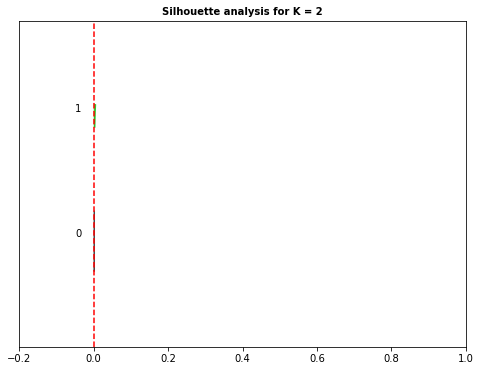

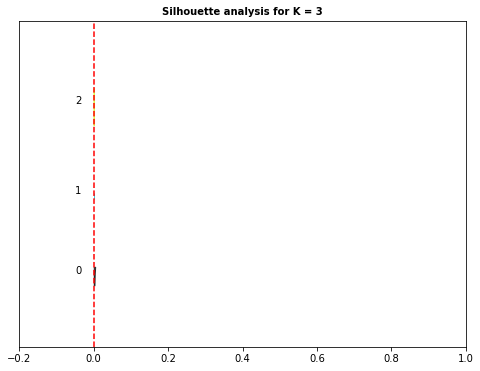

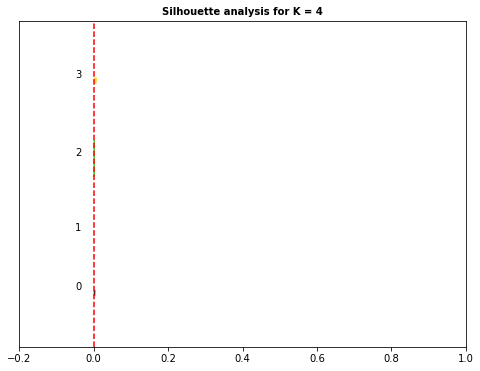

In [128]:
silhouette(kmeans_results, final_df, plot=True)

In [129]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

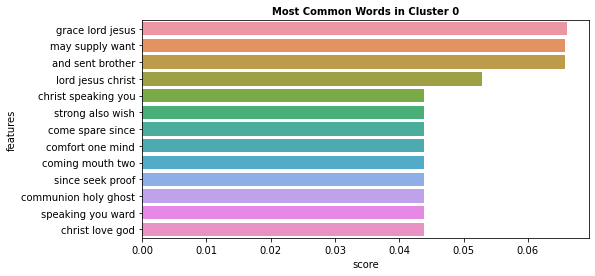

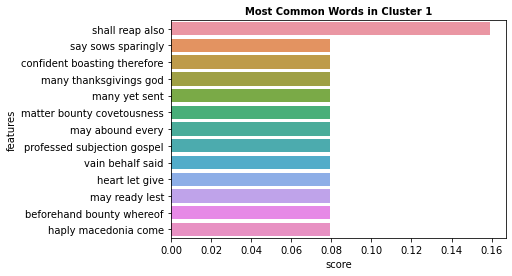

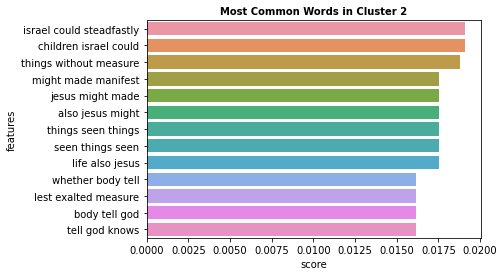

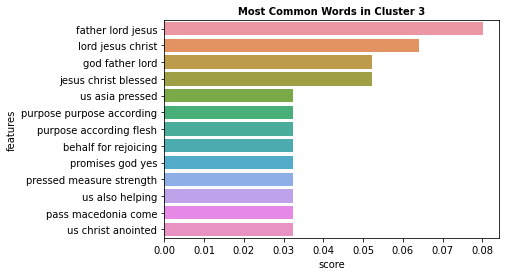

In [130]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [131]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

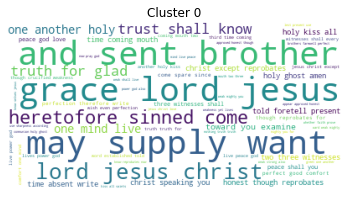

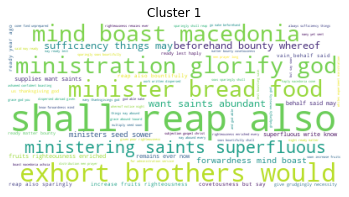

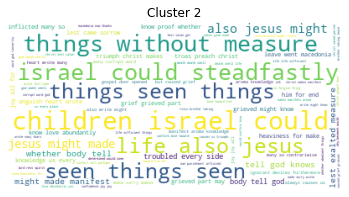

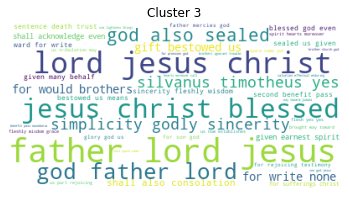

In [132]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [133]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,II_Corintios_1,"'paul', ',', 'apostle', 'jesus', 'christ', 'go...",3
101,II_Corintios_2,"'determined', ',', 'would', 'come', 'heaviness...",2
102,II_Corintios_3,"'begin', 'commend', '?', 'need', ',', 'others'...",2
103,II_Corintios_4,"'therefore', 'seeing', 'ministry', ',', 'recei...",2
104,II_Corintios_5,"'know', 'earthly', 'house', 'tabernacle', 'dis...",2


In [134]:
print(df)

               Autor                                              Livro  label
100   II_Corintios_1  'paul', ',', 'apostle', 'jesus', 'christ', 'go...      3
101   II_Corintios_2  'determined', ',', 'would', 'come', 'heaviness...      2
102   II_Corintios_3  'begin', 'commend', '?', 'need', ',', 'others'...      2
103   II_Corintios_4  'therefore', 'seeing', 'ministry', ',', 'recei...      2
104   II_Corintios_5  'know', 'earthly', 'house', 'tabernacle', 'dis...      2
105   II_Corintios_6  ',', 'workers', 'together', ',', 'beseech', 'a...      2
106   II_Corintios_7  'therefore', 'promises', ',', 'dearly', 'belov...      2
107   II_Corintios_8  'moreover', ',', 'brothers', ',', 'wit', 'grac...      0
108   II_Corintios_9  'touching', 'ministering', 'saints', ',', 'sup...      1
109  II_Corintios_10  'paul', 'beseech', 'meekness', 'gentleness', '...      2
110  II_Corintios_11  'would', 'god', 'could', 'bear', 'little', 'fo...      3
111  II_Corintios_12  'expedient', 'doubtless', 'glo